<a href="https://colab.research.google.com/github/mlengineer666/Google_colab/blob/main/Pandas_Multi_indexing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiindex Series and DataFrame**

In [ ]:
import numpy as np
import pandas as pd


# some recap for me
temp = {
    'name':['nitin','nitesh'],
    'age':[20,22],
    'weight':[76,69]
}


temp2 = {
    'name':['ani','senti'],
    'bmr':[30,24],
    'marks':[66,60]
}

df = pd.DataFrame(temp)
x = df[df['name']=='nitin']

df2 = pd.DataFrame(temp2)
df2


s = df2.merge(df,how='outer',on='name')
x = s.groupby(['name','weight'])['weight'].sum()

#  Multi index start
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

a = pd.Series([1,2,3,4,5,6,7,8],index = index_val)
a

,0
"(cse, 2019)",1
"(cse, 2020)",2
"(cse, 2021)",3
"(cse, 2022)",4
"(ece, 2019)",5
"(ece, 2020)",6
"(ece, 2021)",7
"(ece, 2022)",8


This above problem have some problem

In [ ]:
# e.g->
"a['cse']" f'it will through an error'

" here is the better way to solve this problem "

f'1. to create multiindex series we need to create multiindex object '
f' Here is how we can create multiindex object'

" There is two way to create multiindex object "
"""
1. pd.MultiIndex.from_tuples()
2. pd.MultiIndex.from_product()

"""

index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

' MultiIndexin with from tuples'
a = pd.MultiIndex.from_tuples(index_val)

' MultiIndexin with from product -> in this case we have to pass 2D list'
' We can say caresian product of two sets '
b = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
b

'Now we create Series using both objects'
pd.Series([1,2,3,4,5,6,7,8],index=a)
pd.Series([1,2,3,4,5,6,7,8],index=b)
b

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [ ]:
f'step 1 -> create multi index object using pd.MultiIndex.from_product '
f'setp 2-> create Series'

' because of hierarchial indexing we can see one index of me and one for ce'

multi_index = pd.MultiIndex.from_product([['ME','CE'],[2011,2012,2013,2014,2015]])
pd.Series([1,2,3,4,5,6,7,8,9,10],index=multi_index)



ME  2011     1
    2012     2
    2013     3
    2014     4
    2015     5
CE  2011     6
    2012     7
    2013     8
    2014     9
    2015    10
dtype: int64

In [ ]:
# fetch items from series

s = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2013,2014]])
x = pd.Series([1,2,3,4,5,6,7,8],index=s)

print(x)
# Now fetch 4
x[('cse',2014)]
x['cse'].astype('int8')

# The dimension of this series
print(np.ndim(x))

cse  2019    1
     2020    2
     2013    3
     2014    4
ece  2019    5
     2020    6
     2013    7
     2014    8
dtype: int64
1


In [ ]:
# we can convert this MultiIndex_series into dataframe using unstack
'Unstack'
x   # -> this is series
x.unstack()  # this is dataframe

#  fetch
x[('cse',2019)]
x

cse  2019    1
     2020    2
     2013    3
     2014    4
ece  2019    5
     2020    6
     2013    7
     2014    8
dtype: int64

In [ ]:
# we can convert this DataFrame into MultiIndex_series using stack

x.unstack()  # DataFrame
# s.stack()  # MultiIndex Series



,2013,2014,2019,2020
cse,3,4,1,2
ece,7,8,5,6


In [ ]:
branch_df = pd.DataFrame(
    [
        [1,2],
        [3,5],
        [7,9],
        [3,3],
        [11,12],
        [13,14],
        [15,17],
        [20,19]
    ],
    index=b,
    columns=['average_package','students']
)
branch_df

average_package  students
cse 2019                1         2
    2020                3         5
    2021                7         9
    2022                3         3
ece 2019               11        12
    2020               13        14
    2021               15        17
    2022               20        19

In [ ]:
branch_df.iloc[0:10:2]
branch_df['average_package']
branch_df[['average_package','students']]

average_package  students
cse 2019                1         2
    2020                3         5
    2021                7         9
    2022                3         3
ece 2019               11        12
    2020               13        14
    2021               15        17
    2022               20        19

In [5]:
import pandas as pd

branch_df2 = pd.DataFrame(
    [
        [1,2,4,6],
        [4,6,8,9],
        [10,12,14,16],
        [18,20,22,24],
        [31,34,56,67]
    ],
    index = [2019,2020,2021,2022,2023],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['average_package','students']])
)
branch_df2
branch_df2['mumbai']
branch_df2.loc[2019]
branch_df2.loc[2020]
# This is also 3d

delhi   average_package    4
        students           6
mumbai  average_package    8
        students           9
Name: 2020, dtype: int64

In [ ]:
# multiindex in cloumn and row both
branch_df3 = pd.DataFrame(
    [
        [1,2,4,6],
        [4,6,8,9],
        [10,12,14,1],
        [18,20,22,24],
        [10,12,4,16],
        [18,20,2,24],
        [10,1,14,1],
        [18,20,22,24],
    ],
    index = b ,

    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['average_package','students']])
)
location_delhi = branch_df3.loc[('cse',2019)]
location_delhi.loc["delhi"]
location_mumbai = branch_df3.loc[('ece',2022)]
location_mumbai.loc['mumbai']
np.ndim(branch_df3)
branch_df3
# 4d representation

delhi                   mumbai         
         average_package students average_package students
cse 2019               1        2               4        6
    2020               4        6               8        9
    2021              10       12              14        1
    2022              18       20              22       24
ece 2019              10       12               4       16
    2020              18       20               2       24
    2021              10        1              14        1
    2022              18       20              22       24

In [ ]:
branch_df.unstack().stack().stack().unstack()
# branch_df.unstack().unstack()
# branch_df.unstack().unstack().unstack() # multiindexing in columns
# branch_df.stack()  # multiindexing in rows

<ipython-input-11-5af6916e22a2>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df.unstack().stack().stack().unstack()


average_package  students
cse 2019                1         2
    2020                3         5
    2021                7         9
    2022                3         3
ece 2019               11        12
    2020               13        14
    2021               15        17
    2022               20        19

In [ ]:
print(branch_df2)
branch_df2.unstack().unstack().unstack()

               delhi                   mumbai         
     average_package students average_package students
2019               1        2               4        6
2020               4        6               8        9
2021              10       12              14       16
2022              18       20              22       24


2019                     2020                     2021  \
       average_package students average_package students average_package   
delhi                1        2               4        6              10   
mumbai               4        6               8        9              14   

                           2022           
       students average_package students  
delhi        12              18       20  
mumbai       16              22       24

In [ ]:
# stack  ---> {col -> row}
branch_df2.stack().stack()

<ipython-input-13-fee81bbe6cfd>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack()


2019  average_package  delhi      1
                       mumbai     4
      students         delhi      2
                       mumbai     6
2020  average_package  delhi      4
                       mumbai     8
      students         delhi      6
                       mumbai     9
2021  average_package  delhi     10
                       mumbai    14
      students         delhi     12
                       mumbai    16
2022  average_package  delhi     18
                       mumbai    22
      students         delhi     20
                       mumbai    24
dtype: int64

In [ ]:
print(branch_df3)
# print(branch_df3.unstack())
branch_df3.stack().stack()

                   delhi                   mumbai         
         average_package students average_package students
cse 2019               1        2               4        6
    2020               4        6               8        9
    2021              10       12              14        1
    2022              18       20              22       24
ece 2019              10       12               4       16
    2020              18       20               2       24
    2021              10        1              14        1
    2022              18       20              22       24


<ipython-input-14-56add15f7d84>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  2019  average_package  delhi      1
                            mumbai     4
           students         delhi      2
                            mumbai     6
     2020  average_package  delhi      4
                            mumbai     8
           students         delhi      6
                            mumbai     9
     2021  average_package  delhi     10
                            mumbai    14
           students         delhi     12
                            mumbai     1
     2022  average_package  delhi     18
                            mumbai    22
           students         delhi     20
                            mumbai    24
ece  2019  average_package  delhi     10
                            mumbai     4
           students         delhi     12
                            mumbai    16
     2020  average_package  delhi     18
                            mumbai     2
           students         delhi     20
                            mumbai    24
     2021  average_package  delhi     10
                            mumbai    14
           students         delhi      1
                            mumbai     1
     2022  average_package  delhi     18
                            mumbai    22
           students         delhi     20
                            mumbai    24
dtype: int64

In [ ]:
a = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
a
pd.Series([1,2,3,4,5,6,7,8],index=a)
a
b = pd.DataFrame(
    [
    [1,2],
    [3,5],
    [5,6],
    [9,0],
    [10,11],
    [10,1],
    [10,21],
    [9,11]
    ],
    index = a,
    columns =['Average','Students']
)
b['Average']['cse']
b['Students']
np.ndim(b)
c = b.unstack().stack()
np.ndim(c)
c

<ipython-input-15-3b6d8baf649c>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  c = b.unstack().stack()


Average  Students
cse 2019        1         2
    2020        3         5
    2021        5         6
    2022        9         0
ece 2019       10        11
    2020       10         1
    2021       10        21
    2022        9        11

In [ ]:
branch_df3.head(3)
branch_df3.describe()
branch_df3.info()
branch_df3.shape
branch_df3.unstack().info()
branch_df3.duplicated()
branch_df3.isnull( )


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   (delhi, average_package)   8 non-null      int64
 1   (delhi, students)          8 non-null      int64
 2   (mumbai, average_package)  8 non-null      int64
 3   (mumbai, students)         8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   (delhi, average_package, 2019)   2 non-null      int64
 1   (delhi, average_package, 2020)   2 non-null      int64
 2   (delhi, average_package, 2021)   2 non-null      int64
 3   (delhi, average_package, 2022)   2 non-null      int64
 4   (delhi, students, 2019)

delhi                   mumbai         
         average_package students average_package students
cse 2019           False    False           False    False
    2020           False    False           False    False
    2021           False    False           False    False
    2022           False    False           False    False
ece 2019           False    False           False    False
    2020           False    False           False    False
    2021           False    False           False    False
    2022           False    False           False    False

In [ ]:
# Extracting rows from this data
print(branch_df3)
# np.ndim(branch_df3)
branch_df3['delhi']['average_package']['cse'][2020]

#  Using loc single column
branch_df3.loc['cse',2020]['delhi']

# Fetching multiple columns using loc
branch_df3.loc[('cse',2019):('ece',2020):2]

# Fetching multiple columns using iloc
branch_df3.iloc[1:6:2]

                   delhi                   mumbai         
         average_package students average_package students
cse 2019               1        2               4        6
    2020               4        6               8        9
    2021              10       12              14        1
    2022              18       20              22       24
ece 2019              10       12               4       16
    2020              18       20               2       24
    2021              10        1              14        1
    2022              18       20              22       24


delhi                   mumbai         
         average_package students average_package students
cse 2020               4        6               8        9
    2022              18       20              22       24
ece 2020              18       20               2       24

In [ ]:
# Extracting columns
branch_df3['delhi']['students']
# Multiple columns
print(branch_df3)
# Using loc
branch_df3.loc[('cse',2019),'average_package':'students':2]

# Using iloc
branch_df3.iloc[:,0:4:2]

                   delhi                   mumbai         
         average_package students average_package students
cse 2019               1        2               4        6
    2020               4        6               8        9
    2021              10       12              14        1
    2022              18       20              22       24
ece 2019              10       12               4       16
    2020              18       20               2       24
    2021              10        1              14        1
    2022              18       20              22       24


delhi          mumbai
         average_package average_package
cse 2019               1               4
    2020               4               8
    2021              10              14
    2022              18              22
ece 2019              10               4
    2020              18               2
    2021              10              14
    2022              18              22

In [ ]:
# Extract both
branch_df3.loc[('cse',2019):('ece',2019) : 4 , 'average_package':'students':2]
# using iloc
branch_df3.iloc[0:5:4,0:3:2]

,,delhi,mumbai
,,average_package,average_package
cse,2019,1,4
ece,2019,10,4


In [ ]:
# sort index
print(branch_df3)
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True]) # sorting on level 0 and level 1
#  here Level 0 -> branch & level 1 -> year

branch_df3.sort_index(level=1,ascending=False)

                   delhi                   mumbai         
         average_package students average_package students
cse 2019               1        2               4        6
    2020               4        6               8        9
    2021              10       12              14        1
    2022              18       20              22       24
ece 2019              10       12               4       16
    2020              18       20               2       24
    2021              10        1              14        1
    2022              18       20              22       24


delhi                   mumbai         
         average_package students average_package students
ece 2022              18       20              22       24
cse 2022              18       20              22       24
ece 2021              10        1              14        1
cse 2021              10       12              14        1
ece 2020              18       20               2       24
cse 2020               4        6               8        9
ece 2019              10       12               4       16
cse 2019               1        2               4        6

In [ ]:
# Transpos of dataframe [ column convert into row and row convert into column ]

# Both way is correct to transpose
np.transpose(branch_df3)
branch_df3.transpose()

# swap rows
branch_df3.swaplevel()
# swap columns
branch_df3.swaplevel(axis=1)


average_package students average_package students
                   delhi    delhi          mumbai   mumbai
cse 2019               1        2               4        6
    2020               4        6               8        9
    2021              10       12              14        1
    2022              18       20              22       24
ece 2019              10       12               4       16
    2020              18       20               2       24
    2021              10        1              14        1
    2022              18       20              22       24

LONG VS WIDE

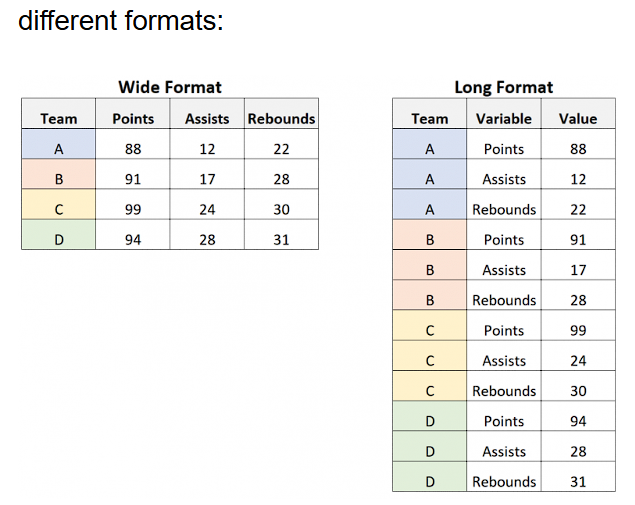

In [ ]:
# melt is used to covert wide data to long data
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [ ]:
pd.DataFrame({'cse':[120,220],'ece':[100,202],'mech':[50,30]}) # wide data
pd.DataFrame({'cse':[120,220],'ece':[100,202],'mech':[50,30]}).melt(var_name='branch',value_name='Num_students') # long data


,branch,Num_students
0,cse,120
1,cse,220
2,ece,100
3,ece,202
4,mech,50
5,mech,30


In [ ]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[120,100,80],
        '2021':[100,140,90],
        '2022':[220,90,700],
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,120
1,ece,2020,100
2,mech,2020,80
3,cse,2021,100
4,ece,2021,140
5,mech,2021,90
6,cse,2022,220
7,ece,2022,90
8,mech,2022,700


In [ ]:
death = pd.read_csv('/content/time_series_covid19_deaths_global (1).csv')
confirm = pd.read_csv('/content/time_series_covid19_confirmed_global (1).csv')
# This is wide data format
death.head()
death.shape

# This is also wide format
confirm.shape
confirm.head()
death.head()
# convert into long format
death_long = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Deaths')
confirm_long = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Cases')

new_long = confirm_long.merge(death_long,on=['Province/State','Country/Region','Lat','Long','Date'])

new_long[['Country/Region','Date','Cases','Deaths']]





,Country/Region,Date,Cases,Deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024
